[딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/64066)과,  
[조성현 강사님 블로그](http://blog.naver.com/chunjein)를 참고했습니다.

# CNN

- 합성곱층과 풀링층으로 구성
![image1](https://wikidocs.net/images/page/64066/convpooling.PNG)

1) 인풋에 대해서 합성곱 연산을 수행  
2) 그 결과가 활성화 함수(ReLU)를 지난다. 여기까지의 과정을 **합성곱층**이라고 한다.  
3) POOL이라는 구간을 지나는데 풀링 연산을 의미하며 **풀링층**이라고 한다.

# CNN의 대두

![image2](https://wikidocs.net/images/page/64066/conv1.png)

주어진 이미지를 기존의 방식(다층 퍼셉트론)을 이용해서 분류한다면, 위와같이 이미지를 1차원 텐서로 변환해야 했다.
- 변환 전의 공간적 구조 정보가 손실된다.
    - 거리가 가까운 픽셀들과의 연관성 정보
    - 어떤 픽셀들 끼리는 값이 비슷하다는 정보

## 합성곱(Convolution) 연산
- 이미지의 특징을 추출하는 역할(합성곱 연산을 통해)
> 즉, kernel 혹은 filter라는 n\*m 크기의 행렬로 height\*width크기의 이미지를 처음부터 끝까지 훑으면서 n\*m크기의 겹쳐지는 부분의 이미지와 필터의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것을 말한다.

- 필터는 일반적으로 3x3 혹은 5x5를 사용하며, 사용자가 정의한다.
- 필터의 이동 범위(stride) 또한 사용자가 지정한다. 아래의 예에서는 1로 지정했다.

![image3](https://wikidocs.net/images/page/64066/conv4.png)

이와 같은 합성곱 연산을 모두 마쳤다고 가정했을 때, 최종 결과를 feature map(특성 맵)이라고 부른다.

![image4](https://wikidocs.net/images/page/64066/conv8.png)


# 패딩
> 합성곱 연산 후 특성맵의 크기가 처음 입력의 크기보다 작아지는 것을 방지하기 위해 연산 전 입력의 가장자리(테두리)에 행과 열을 추가해주는 작업

![image5](https://wikidocs.net/images/page/64066/conv10.png)

- 주로 제로패딩(0으로 채우는 것)을 사용한다.
- 크기 조절 뿐만 아니라 이미지의 외곽 데이터의 특징을 살리기 위해서도 사용된다.

# 가중치와 편향
#### CNN의 가중치

![image6](https://wikidocs.net/images/page/64066/conv13.png)
- CNN에서 가중치는 커널 행렬의 원소들이다. 인풋이 커널의 원소들과 곱해져 특성맵의 원소로 계산되기 때문이다.
    - 합성곱 연산시, 커널과 매핑되는 픽셀만 입력으로 사용
    - 다층 퍼셉트론보다 훨씬 적은 가중치를 사용하여 공간적 정보를 보존한다.
    
- 합성곱 연산을 통해 얻은 특성 맵은 비선형성 추가를 위해 활성화함수(주로 렐루와 그의 변형)를 지나게 된다.  

**- 합성곱 연산으로 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 은닉층을 합성곱 층이라고 한다.**

#### 합성곱 신경망의 편향
- 특성맵에 하나의 공통 편향이 추가되어 커널의 모든 원소에 더해진다.

## Feature Map 크기 계산 
- Ih : 입력의 높이
- Iw : 입력의 너비
- Kh : 커널의 높이
- Kw : 커널의 너비
- S : 스트라이드
- Oh : 특성 맵의 높이
- Ow : 특성 맵의 너비
- P : 패딩의 폭
- floor : 소수점을 버리는 역할


$$
O_h = floor(\frac{I_h-K_h+2P}{S}+1)
$$
$$
O_w = floor(\frac{I_w-K_w+2P}{S}+1)
$$


## 3차원 텐서(다수의 채널을 가진 텐서)의 합성곱 연산

![image](https://wikidocs.net/images/page/64066/conv15.png)

- 커널의 채널 수도 입력의 채널 수 만큼 존재해야 한다.
    - 합성곱 연산을 채널마다 수행한다.
    - 그 결과를 모두 더하여 최종 특성 맵을 얻는다.
    - 커널은 모두 크기가 같아야 한다.(하나의 커널이며, 3개의 채널을 가지는 것이다.)

## 풀링
> 풀링층에서는 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어진다.

- 일반적으로 합성곱 층 다음에는 풀링 층을 추가한다.
- 일반적으로 maxpooling과 average pooling이 사용된다.
    - maxpooling은 특정 영역의 대푯값을 선택하여 영역을 강조하는 효과

- 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념이 있다.  
- 풀링을 하면 특성맵의 크기가 줄어든다. 즉, 특성맵의 가중치의 개수를 줄여준다.  
- 데이터가 버려지지만 시각불변성(고양이의 코가 약간 달라지거나 위치가 변해도 정상인식하는 등)의 장점이 있다.  
    - 부분적 특징은 잘 추출해도 그것들의 관계는 인식하지 못한다.
**- 합성곱 연산과의 차이점은 가중치가 없으며 연산 후에 채널 수가 변하지 않는다.**  
- pooling layer의 출력은 1차원으로 flatten되어 FFN으로 전달될 수 있다.

## nD-convolution 설명
> n은 filter가 이동하는 차원을 의미
    
| 차원 | 적용 데이터           | shape                              |
| ---- | --------------------- | ---------------------------------- |
| 1D   | 시계열, 음성, 문장 등 | (batch, time-step, feature) 3차원        |
| 2D   | 사진                  | *(batch, row, column, channel) 4차원     |
| 3D   | 동영상                | (batch, dim1, dim2, dim3, channel) 5차원 |

\* 원래는 (batch, channel, row, col)의 형태이나, 라이브러리에서 편의상 위의 표와 같이 맞추도록  설계 됨

C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 30)            270       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 30)            0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 283.5387
Epoch 2/100
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1602
Epoch 92/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1656
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1629
Epoch 94/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1609
Epoch 95/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1698
Epoch 96/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 97/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1606
Epoch 98/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1573
Epoch 99/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1544
Epoch 100/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1640


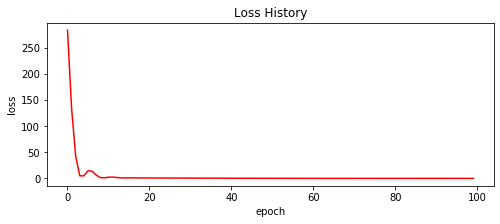

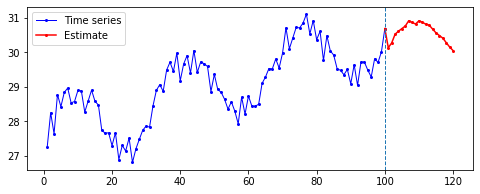

In [1]:
# CNN 예시 : 1D convolution을 이용하여 noisy sine with trend 시계열을 예측한다.
# 
# [Convolution --> Max pooling] -> [Fulliy connected N/W]
# Convolution/Pooling layer 1개와 단층 신경망으로 구성한다.
#
# 2020.03.31, 아마추어퀀트 (조성현)
# --------------------------------------------------------------------------
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# Batch data를 생성한다.
def createTrainData(xData, step):
    m = np.arange(len(xData) - step)
    
    x = []
    y = []
    for i in m:
        a = xData[i:(i+step)]
        x.append(a)
    
    # Conv1D를 사용하기 위해 3차원 구조로 변환한다. (batch_size, steps, input_dim)
    xBatch = np.reshape(np.array(x), (len(m), step, 1))
    
    for i in m+1:
        a = xData[i:(i+step)][-1]
        y.append(a)
    yBatch = np.reshape(np.array(y), (len(m), 1))
    
    return xBatch, yBatch

# 시계열 데이터 (noisy sine with trend)
nStep = 20
nFeature = 1
data = np.sin(2 * np.pi * 0.03 * np.arange(1001)) + np.random.random(1001) + np.arange(1001)*0.03 # noisy sine with trend
x, y = createTrainData(data, nStep)

########################### Convolutional 1D 모델을 생성한다.###############################
xInput = Input(batch_shape = (None, nStep, nFeature)) ## 3D구조로 데이터 만든다(RNN과 같다.)
xConv = Conv1D(filters=30, kernel_size=8, strides=1, padding = 'valid', activation='relu')(xInput)
xPool = MaxPooling1D(pool_size=4, strides=1, padding='valid')(xConv)
xFlat = Flatten()(xPool)
xOutput = Dense(1, activation='linear')(xFlat)

model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer = optimizers.Adam(lr=0.001))
model.summary()

# 모델을 학습한다.
h = model.fit(x, y, epochs = 100, batch_size = 300)

# 향후 20 기간 데이터를 예측한다. 향후 1 기간을 예측하고, 예측값을 다시 입력하여 2 기간을 예측한다.
# 이런 방식으로 20 기간까지 예측한다.
nFuture = 20
if len(data) > 100:
    lastData = np.copy(data[-100:])  # 원 데이터의 마지막 150개만 그려본다
else:
    lastData = np.copy(data)
dx = np.copy(lastData)
estimate = [dx[-1]]
for i in range(nFuture):
    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다
    px = dx[-nStep:]
    px = np.reshape(px, (-1, nStep, nFeature))
    
    # 다음 값을 예측한다.
    yHat = model.predict(px)[0][0]
    
    # 예측값을 저장해 둔다
    estimate.append(yHat)
    
    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    dx = np.insert(dx, len(dx), yHat)

# Loss history를 그린다
plt.figure(figsize=(8, 3))
plt.plot(h.history['loss'], color='red')
plt.title("Loss History")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 원 시계열과 예측된 시계열을 그린다
ax1 = np.arange(1, len(lastData) + 1)
ax2 = np.arange(len(lastData), len(lastData) + len(estimate))
plt.figure(figsize=(8, 3))
plt.plot(ax1, lastData, 'b-o', markersize=2, color='blue', label='Time series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', markersize=2, color='red', label='Estimate')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.legend()
plt.show()


In [2]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 30)            270       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 30)            0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


con1d의 파라미터의 개수

## LSTM & CNN network

#### 병렬

- 렐루함수를 사용했을 때 다수의 W가 0으로 출력될 수 있으므로 W를 확인해야 한다.



#### 직렬

- LSTM의 히든레이어가 3D로 출력되려면  LSTM의 인자로 return_sequences=True를 설정한다.
- Timedistributed()인자를 사용하면, 중간결과를 이용하여 back propagation(역전파)을 한다는 의미이다. 현재 직렬 구조의 Latent feature는 중간 결과값을 알 수 없기 때문에 역전파를 할 수 없다.